# Data preparation and analysis


## Imports

In [1]:
# Imports
%matplotlib inline
import gzip
import shutil
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from mapping_gff3 import MappingGff3
import xml.etree.ElementTree as et
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import random
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
from sklearn.cluster import SpectralClustering
from sklearn.metrics import consensus_score
import itertools
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.manifold import MDS
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets._samples_generator import make_blobs
from sklearn.cluster import OPTICS
from scipy.stats import kstest
from scipy.stats import lognorm
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support


## Load data


### Load gene vs. sample data

In [2]:
IntVeld2022_data_path = 'Data/IntVeld2022'
file_in = f"{IntVeld2022_data_path}/TEP_Count_Matrix.tsv.gz"
file_out = f"{IntVeld2022_data_path}/TEP_Count_Matrix.tsv"

with gzip.open(file_in, 'rb') as f_in:
    with open(file_out, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [3]:
data_df = pd.read_csv(file_out, sep='\t')
print(data_df.shape)
data_df.head(5)

(5440, 2351)


,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
ENSG00000000419,5,79,58,128,93,12,0,0,18,28,...,3,0,1,2,9,16,22,21,0,1
ENSG00000000460,8,10,21,14,6,8,25,42,5,7,...,0,3,0,2,63,3,3,0,1,0
ENSG00000000938,24,336,334,59,120,22,31,13,19,36,...,8,45,1,7,163,90,46,75,14,8
ENSG00000001036,38,46,15,36,25,43,27,27,59,5,...,1,3,4,15,3,6,10,8,3,0
ENSG00000001461,72,17,11,9,18,28,5,6,49,18,...,1,1,0,0,12,2,6,6,1,0


In [4]:
data_df.describe()

,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
count,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,...,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000
mean,416.658088,306.222059,200.325551,195.664706,237.270037,334.639706,341.358272,252.479228,394.240809,245.939706,...,8.734191,20.176471,10.531985,68.953676,72.238235,45.864338,60.372794,58.598346,26.045956,12.340257
std,3066.455618,1793.920257,952.352515,1038.835194,1730.393051,3177.352322,3628.050653,2653.946262,3450.241199,2257.938852,...,42.144076,95.671902,61.385799,632.827481,240.796406,167.926359,279.658516,280.009581,159.463452,69.402550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,38.000000,28.000000,15.000000,16.000000,10.000000,9.000000,7.000000,12.000000,10.000000,...,1.000000,2.000000,1.000000,0.000000,13.000000,7.000000,7.000000,7.000000,2.000000,0.000000
50%,46.000000,79.000000,57.000000,40.000000,39.000000,32.000000,32.000000,23.000000,37.000000,30.000000,...,2.000000,6.000000,2.000000,7.000000,30.000000,16.000000,17.000000,16.000000,6.000000,2.000000
75%,155.000000,175.250000,127.250000,106.000000,106.000000,113.000000,105.000000,82.000000,131.000000,92.000000,...,6.000000,14.000000,6.000000,25.000000,63.000000,36.000000,43.000000,39.000000,15.000000,7.000000
max,145767.000000,84007.000000,34436.000000,34350.000000,67053.000000,170113.000000,203036.000000,121701.000000,149776.000000,117896.000000,...,1942.000000,3794.000000,2481.000000,27572.000000,9134.000000,6704.000000,14273.000000,10810.000000,6394.000000,2576.000000


In [5]:
# Count missing values
data_df.isna().sum().sum()

0

In [6]:
# Count equal values 0 (0 number of genes in the sample)
data_df.isin([0]).sum(axis=1).sum()

1134949

### TPM normalization.
References:

https://www.rna-seqblog.com/rpkm-fpkm-and-tpm-clearly-explained/

https://support.bioconductor.org/p/9146002/

Uses the MappingGff3 utility class to calculate the length of each gene according to the Human comprehensive gene annotation GFF3
(https://www.gencodegenes.org/human/release_19.html)

#### 1. Calculate the size of each gene

In [7]:
# Set the following variable for the different types of gene size calculation. The possible values are: 'mean', 'max' or 'min'
length_type = 'max'

gff3_path = "Data/ComprehensiveGeneAnnotation"
m_gff3 = MappingGff3(f"{gff3_path}/gencode.v19.annotation.gff3.gz")
gene_length_method = ['max', 'min','mean']
for method in gene_length_method:
    file_name = f"{gff3_path}/genes_length_{method}.csv"
    if not os.path.exists(file_name):
        m_gff3.generate_gff3_db()
        length_file = [(x, m_gff3.get_length_gene_kb(x, method=method)) for x in data_df.index.tolist()]
        pd.DataFrame(length_file).to_csv(file_name, index=False, header =['Gene_name', f"length_{method}"])

In [8]:
gene_length = pd.read_csv(f"{gff3_path}/genes_length_{length_type}.csv", sep=',')

In [9]:
gene_length.head(5)

,Gene_name,length_max
0,ENSG00000000419,1.151
1,ENSG00000000460,4.331
2,ENSG00000000938,2.716
3,ENSG00000001036,2.349
4,ENSG00000001461,5.468


#### 2. Normalize for gene length. Divide the read counts by the length of each gene in kilobases. This gives you reads per kilobase (RPK).

In [10]:
df_genes_normalized = data_df.div(gene_length[f"length_{length_type}"].tolist(), axis = 0)
df_genes_normalized.head(5)

,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
ENSG00000000419,4.344049,68.635969,50.390964,111.207646,80.799305,10.425717,0.000000,0.000000,15.638575,24.326672,...,2.606429,0.000000,0.868810,1.737619,7.819288,13.900956,19.113814,18.245004,0.000000,0.868810
ENSG00000000460,1.847148,2.308936,4.848765,3.232510,1.385361,1.847148,5.772339,9.697529,1.154468,1.616255,...,0.000000,0.692681,0.000000,0.461787,14.546294,0.692681,0.692681,0.000000,0.230894,0.000000
ENSG00000000938,8.836524,123.711340,122.974963,21.723122,44.182622,8.100147,11.413844,4.786451,6.995582,13.254786,...,2.945508,16.568483,0.368189,2.577320,60.014728,33.136966,16.936672,27.614138,5.154639,2.945508
ENSG00000001036,16.177097,19.582801,6.385696,15.325670,10.642827,18.305662,11.494253,11.494253,25.117071,2.128565,...,0.425713,1.277139,1.702852,6.385696,1.277139,2.554278,4.257131,3.405705,1.277139,0.000000
ENSG00000001461,13.167520,3.108998,2.011704,1.645940,3.291880,5.120702,0.914411,1.097293,8.961229,3.291880,...,0.182882,0.182882,0.000000,0.000000,2.194587,0.365764,1.097293,1.097293,0.182882,0.000000


#### 3. Normalize for sequencing depth. Count up all the RPK values in a sample and divide this number by 1,000,000. This is your “per million” scaling factor.

In [11]:
# x / (x.sum()/ scaling_factor) = (x*scaling_factor)/x.sum()
df_genes_normalized = df_genes_normalized.transform(lambda x: (x*10**6)/x.sum())
df_genes_normalized.head(5)

,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
ENSG00000000419,4.095057,76.170510,92.725472,173.743823,99.233270,10.460905,0.000000,0.000000,13.673941,33.805396,...,108.844833,0.000000,30.302673,7.984921,46.834429,116.900018,124.796011,118.553809,0.000000,21.781520
ENSG00000000460,1.741274,2.562400,8.922314,5.050270,1.701425,1.853383,5.520069,11.889019,1.009435,2.246018,...,0.000000,12.144979,0.000000,2.122061,87.126528,5.825095,4.522582,0.000000,3.000107,0.000000
ENSG00000000938,8.330033,137.291803,226.288814,33.938838,54.262670,8.127486,10.915022,5.868113,6.116745,18.419424,...,123.004813,290.500209,12.841818,11.843614,359.464396,278.665153,110.581229,179.433298,66.976625,73.845447
ENSG00000001036,15.249858,21.732511,11.750453,23.943863,13.070935,18.367445,10.991917,14.091774,21.961678,2.957946,...,17.777835,22.392467,59.392723,29.344330,7.649557,21.480192,27.795234,22.129852,16.594464,0.000000
ENSG00000001461,12.412785,3.450289,3.701780,2.571513,4.042906,5.137985,0.874448,1.345264,7.835453,4.574539,...,7.637186,3.206529,0.000000,0.000000,13.144703,3.075894,7.164338,7.130078,2.376274,0.000000


In [12]:
# Count missing values
df_genes_normalized.isna().sum().sum()

0

In [13]:
# Count equal values 0 (0 number of genes normalized in the sample)
df_genes_normalized.isin([0]).sum(axis=1).sum()

1134949

In [14]:
df_genes_normalized.describe()

,1-Vumc-HD-101-TR922,2-Vumc-HD-103-TR923,3-Vumc-HD-108-TR924,4-Vumc-HD-127-TR925,5-Vumc-HD-130-TR926,6-Vumc-HD-142-TR927,7-Vumc-HD-143-TR928,8-Vumc-HD-144-TR929,9-Vumc-HD-145-TR930,11-Vumc-HD-149-TR932,...,countMatrix.3502-NKI-4854-SARC-TR3080,countMatrix.3503-NKI-4707-SARC-TR3079,countMatrix.3504-NKI-4941-SARC-TR3084,countMatrix.3507-NKI-6348-SARC-TR3134,countMatrix.3508-NKI-5275-SARC-TR3099,countMatrix.3512-NKI-5148-SARC-TR3129,countMatrix.320-10,countMatrix.327-34,countMatrix.376-P-PH-001-013-TR1400,countMatrix.506-NKI-NSCLC-107-270
count,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,...,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000,5440.000000
mean,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,...,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529,183.823529
std,2225.672715,1714.374324,1443.983223,1471.553817,1985.420361,2704.156126,2921.734411,3143.498211,2483.268787,2687.615540,...,1477.566267,1703.344322,1999.304950,2866.284491,989.872203,907.721878,1300.232758,1520.600443,2110.378295,2024.842170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.905467,9.892089,12.850691,5.824526,4.402930,2.425565,2.224363,2.127199,2.688132,3.655445,...,7.856849,9.369208,6.057772,0.000000,20.267633,14.700309,11.212895,11.989397,6.310955,0.000000
50%,12.569094,25.900696,31.515115,17.802774,13.933404,9.046933,8.897151,8.169015,9.135503,12.094655,...,29.140065,29.300848,24.601219,8.835459,51.115725,39.675944,32.781947,28.969700,22.237191,14.401456
75%,47.282246,70.903064,82.004554,57.038784,48.144050,38.870114,34.813277,34.052549,39.369296,43.312324,...,85.420900,84.509028,72.225897,39.374415,124.851997,105.504623,92.000071,83.925453,66.275077,56.764005
max,120105.900255,85066.155332,70118.431429,67099.303400,101644.530618,148868.734274,160234.777206,191239.777440,131327.815521,147731.567897,...,68446.736750,93428.856696,121535.467616,177952.557944,44249.033915,32949.885950,54465.137403,78366.962127,116685.697616,90704.611436


In [15]:
df_genes_normalized_t = df_genes_normalized.transpose()
df_genes_normalized_t.head(5)

,ENSG00000000419,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000267279,ENSG00000267316,ENSG00000268555,ENSG00000269028,ENSG00000270055,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888
1-Vumc-HD-101-TR922,4.095057,1.741274,8.330033,15.249858,12.412785,1.815643,6.687894,5.566237,41.660991,28.708953,...,144.630669,432.783907,197.995292,833.519642,25.271901,317.563736,899.540795,10.779548,61.433211,26.599380
2-Vumc-HD-103-TR923,76.170510,2.562400,137.291803,21.732511,3.450289,8.549888,3.662021,21.998922,39.428762,51.453223,...,130.740664,190.829494,64.170687,418.207808,8.500407,142.471167,711.034292,4.976571,102.248970,39.455898
3-Vumc-HD-108-TR924,92.725472,8.922314,226.288814,11.750453,3.701780,4.252976,28.842022,13.969708,23.918384,81.132608,...,78.142125,156.671405,71.977523,433.394547,5.481212,175.841680,526.772714,4.538415,99.242482,37.383948
4-Vumc-HD-127-TR925,173.743823,5.050270,33.938838,23.943863,2.571513,3.911861,4.382071,13.178718,35.199968,29.116281,...,107.009386,122.587380,31.884429,476.827101,5.983418,131.200117,403.134677,10.859293,10.532609,17.633601
5-Vumc-HD-130-TR926,99.233270,1.701425,54.262670,13.070935,4.042906,2.128911,3.444723,12.949653,39.377269,60.290759,...,122.814509,319.850808,64.749146,784.614774,10.974914,202.715068,978.210988,17.898976,140.753707,31.188786


In [16]:
print(df_genes_normalized_t.shape)

(2351, 5440)


In [17]:
# Check TPM normalization, each sample (row) must sum 1MM
assert df_genes_normalized_t.shape[0] * 1_000_000 == df_genes_normalized_t.sum(axis=1).sum()

### Create DataFrame with labels (ground truth)

#### Add labels

In [18]:
xtree = et.parse(f"{IntVeld2022_data_path}/IntVeld2022_metadata.xml")
xroot = xtree.getroot()
df_cols = ["ID", "Classification", "Patient_group", "Center", "Source", "Cell_type"]
rows = []
for node in xroot: 
    s_description = node.find("Description").find("Title").text if node is not None else None
    s_center = node.find("Owner").find("Name").text if node is not None else None
    s_source_name, s_cell_type, s_classification_group, s_patient_group = None, None, None, None
    for attb in node.find("Attributes").findall("Attribute"):
        match attb.attrib.get("attribute_name"):
                case 'source_name':
                    s_source_name = attb.text
                case 'cell type':
                    s_cell_type = attb.text
                case 'classification group':
                    s_classification_group = attb.text
                case 'patient group':
                    s_patient_group = attb.text
    rows.append({"ID": s_description, "Classification": s_classification_group, "Center": s_center, 
                "Patient_group": s_patient_group, "Center": s_center, "Source": s_source_name,
                "Cell_type": s_cell_type})
df_labels = pd.DataFrame(rows, columns = df_cols, dtype="category").set_index('ID')

In [19]:
print(df_labels.shape)
df_labels.sample(5)

(2351, 5)


,Classification,Patient_group,Center,Source,Cell_type
ID,,,,,
Vumc-GBM-518t0-TR1584,Malignant,Glioma,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-GBM-518t0,Thrombocytes
NKI-NSCLC-3022-TR2259,Malignant,Non-Small-Cell Lung Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_NKI-NSCLC-3022-TR2259,Thrombocytes
Vumc-HNSCC-HN-616-TR1952,Malignant,Head and Neck Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-headNeck-616,Thrombocytes
VUMC-Vumc-1617-NSCLC-TR3165,Malignant,Non-Small-Cell Lung Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-1617,Thrombocytes
Vumc-NSCLC-207-TR981,Malignant,Non-Small-Cell Lung Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-NSCLC-207,Thrombocytes


In [20]:
df_labels.describe(include = 'category')

,Classification,Patient_group,Center,Source,Cell_type
count,2351,2351,2351,2351,2351
unique,2,28,1,2341,1
top,Malignant,Non-Small-Cell Lung Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_64,Thrombocytes
freq,1648,522,2351,2,2351


In [21]:
df_labels["Classification"] = df_labels["Classification"].cat.as_ordered()
df_labels["Patient_group"] = df_labels["Patient_group"].cat.as_ordered()
print("Number of Patient_groups: ", len(df_labels["Patient_group"].unique()))
df_labels[["Patient_group"]].agg( {
        "Patient_group": ["value_counts"]
    })


Number of Patient_groups:  28


,Patient_group
,value_counts
Non-Small-Cell Lung Cancer,522
Asymptomatic Controls,391
Ovarian Cancer,144
Glioma,132
Pancreatic Cancer,126
Head and Neck Cancer,101
Breast Cancer,93
Multiple Sclerosis,86
Cholangiocarcinoma,85


In [22]:
df_labels[["Classification"]].agg( {
        "Classification": ["value_counts"]
    })

,Classification
,value_counts
Malignant,1648
nonMalignant,703


In [23]:
df_labels[["Classification", "Patient_group"]].groupby("Patient_group").agg( {
        "Classification": ["value_counts"]
    })

Classification
                                            value_counts
Patient_group              Classification               
Angina Pectoris            nonMalignant               26
                           Malignant                   0
Asymptomatic Controls      nonMalignant              370
                           Malignant                  21
Bowel Disease              nonMalignant                9
                           Malignant                   0
Breast Cancer              Malignant                  93
                           nonMalignant                0
Cholangiocarcinoma         Malignant                  85
                           nonMalignant                0
Colorectal Cancer          Malignant                  85
                           nonMalignant                0
Endometrial Cancer         Malignant                  39
                           nonMalignant                0
Epilepsy                   nonMalignant               44
                           Malignant                   0
Esophageal Cancer          Malignant                  15
                           nonMalignant                0
Former Sarcoma             nonMalignant               26
                           Malignant                   0
Glioma                     Malignant                 132
                           nonMalignant                0
Head and Neck Cancer       Malignant                 101
                           nonMalignant                0
Hematuria                  nonMalignant                5
                           Malignant                   0
Hepatocellular Carcinoma   Malignant                  23
                           nonMalignant                0
Hodgkin Lymphoma           Malignant                  20
                           nonMalignant                0
Melanoma                   Malignant                  68
                           nonMalignant                0
Multiple Myeloma           Malignant                  31
                           nonMalignant                0
Multiple Sclerosis         nonMalignant               86
                           Malignant                   0
Non-Small-Cell Lung Cancer Malignant                 522
                           nonMalignant                0
Ovarian Cancer             Malignant                 144
                           nonMalignant                0
Pancreatic Cancer          Malignant                 126
                           nonMalignant                0
Pancreatic Disease         nonMalignant               50
                           Malignant                   0
Prostate Cancer            Malignant                  34
                           nonMalignant                1
Pulmonary Hypertension     nonMalignant               71
                           Malignant                   0
Renal Cell Carcinoma       Malignant                  28
                           nonMalignant                0
Sarcoma                    Malignant                  53
                           nonMalignant                0
Urothelial Carcinoma       Malignant                  28
                           nonMalignant                0
nSTEMI                     nonMalignant               15
                           Malignant                   0

In [24]:
df_labels.head(5)

,Classification,Patient_group,Center,Source,Cell_type
ID,,,,,
NKI-NSCLC-4861-TR2958,Malignant,Non-Small-Cell Lung Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_NKI-NSCLC-4861-TR2958,Thrombocytes
TR4012-OVA-GDANSK,Malignant,Ovarian Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_OC_004,Thrombocytes
TR4010-OVA-GDANSK,Malignant,Ovarian Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_OC_002,Thrombocytes
TR4718-OVA-CATH,Malignant,Ovarian Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_CZE 119,Thrombocytes
TR4238-OVA-CATH,Malignant,Ovarian Cancer,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_CZE 108,Thrombocytes


In [25]:
def print_index_diff(index_left, index_right):
    print(f"Indexes_labels length: {len(index_right)}"),
    print(f"Indexes Genes_normalized length: {len(index_left)}")
    print(f"Indexes_labels uniques : {sum([index_right.count(item) for item in index_right])}")
    print(f"(Indexes Genes_normalized uniques: {sum([index_left.count(item) for item in index_left])}")
    indexes_different_left_to_right = [x for x in index_left if x not in set(index_right)]
    indexes_different_right_to_left = [x for x in index_right if x not in set(index_left)]
    print(indexes_different_left_to_right)
    print(indexes_different_right_to_left)

In [26]:
# Merge labels with genes data.

# Remove prefixes in the index of df_genes_normalized_t
indexes_labels = df_labels.index.to_list()
indexes_genes_normalized = [re.sub("(^[\d]*-)|(^countMatrix.[\d]*-)", "", i) for i in df_genes_normalized_t.index.tolist()]
print_index_diff(indexes_genes_normalized, indexes_labels)
#f = pd.DataFrame(df_genes_normalized.index.tolist())
#df.to_csv("Data/IntVeld2022/indices.csv", index=False)


Indexes_labels length: 2351
Indexes Genes_normalized length: 2351
Indexes_labels uniques : 2351


(Indexes Genes_normalized uniques: 2351
['10', '34', 'NKI-NSCLC-107-270']
['Vumc-P-PH-001-010-TR1505', 'NKI-NSCLC-107-270-TR725', 'Vumc-P-PH-001-034-TR1512']


In [27]:
# Remove prefixes in the index of df_genes_normalized_t
indexes_genes_normalized = {i:re.sub("(^[\d]*-)|(^countMatrix.[\d]*-)", "", i) for i in df_genes_normalized_t.index.tolist()}
df_genes_normalized_t.rename(index=indexes_genes_normalized, inplace=True)
# This merge performs an inner join. The indexes that did not match were eliminated.
df_genes_labels = pd.merge(df_genes_normalized_t, df_labels, left_index=True, right_index=True)
print(df_genes_labels.shape)
df_genes_labels.head(5)


(2348, 5445)


,ENSG00000000419,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000271043,ENSG00000272053,ENSG00000272168,ENSG00000272369,ENSG00000272888,Classification,Patient_group,Center,Source,Cell_type
Vumc-HD-101-TR922,4.095057,1.741274,8.330033,15.249858,12.412785,1.815643,6.687894,5.566237,41.660991,28.708953,...,317.563736,899.540795,10.779548,61.433211,26.599380,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-101,Thrombocytes
Vumc-HD-103-TR923,76.170510,2.562400,137.291803,21.732511,3.450289,8.549888,3.662021,21.998922,39.428762,51.453223,...,142.471167,711.034292,4.976571,102.248970,39.455898,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-103,Thrombocytes
Vumc-HD-108-TR924,92.725472,8.922314,226.288814,11.750453,3.701780,4.252976,28.842022,13.969708,23.918384,81.132608,...,175.841680,526.772714,4.538415,99.242482,37.383948,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-108,Thrombocytes
Vumc-HD-127-TR925,173.743823,5.050270,33.938838,23.943863,2.571513,3.911861,4.382071,13.178718,35.199968,29.116281,...,131.200117,403.134677,10.859293,10.532609,17.633601,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-127,Thrombocytes
Vumc-HD-130-TR926,99.233270,1.701425,54.262670,13.070935,4.042906,2.128911,3.444723,12.949653,39.377269,60.290759,...,202.715068,978.210988,17.898976,140.753707,31.188786,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-130,Thrombocytes


#### Add labels Group, Stage, Sex and Age

In [28]:
file = f"{IntVeld2022_data_path}/1-s2.0-S1535610822003701-mmc3.xlsx"
df_labels_xlsx = pd.read_excel(file, header=2).set_index('Sample ID')
df_labels_xlsx.head(5)

,Group,Stage,Sex,Age,Sample-supplying institution,Training series,Evaluation series,Validation series,lib.size,classificationScoreCancer
Sample ID,,,,,,,,,,
Vumc-HD-101-TR922,Asymptomatic controls,n.a.,F,35,Institute 13,1,0,0,2296824,0.485949
Vumc-HD-103-TR923,Asymptomatic controls,n.a.,F,54,Institute 13,0,1,0,1731594,0.370735
Vumc-HD-108-TR924,Asymptomatic controls,n.a.,F,56,Institute 13,0,0,1,1136912,0.799796
Vumc-HD-127-TR925,Asymptomatic controls,n.a.,F,52,Institute 13,1,0,0,1115322,0.580309
Vumc-HD-130-TR926,Asymptomatic controls,n.a.,F,57,Institute 13,0,1,0,1331137,0.402155


In [29]:
df_labels_xlsx.replace('n.a.', np.nan, inplace=True)
df_labels_xlsx.head(5)

,Group,Stage,Sex,Age,Sample-supplying institution,Training series,Evaluation series,Validation series,lib.size,classificationScoreCancer
Sample ID,,,,,,,,,,
Vumc-HD-101-TR922,Asymptomatic controls,NaN,F,35.0,Institute 13,1,0,0,2296824,0.485949
Vumc-HD-103-TR923,Asymptomatic controls,NaN,F,54.0,Institute 13,0,1,0,1731594,0.370735
Vumc-HD-108-TR924,Asymptomatic controls,NaN,F,56.0,Institute 13,0,0,1,1136912,0.799796
Vumc-HD-127-TR925,Asymptomatic controls,NaN,F,52.0,Institute 13,1,0,0,1115322,0.580309
Vumc-HD-130-TR926,Asymptomatic controls,NaN,F,57.0,Institute 13,0,1,0,1331137,0.402155


In [30]:
df_labels_xlsx.drop(['Sample-supplying institution', 'Training series', 'Evaluation series', 'Validation series', 'lib.size', 'classificationScoreCancer'], axis=1, inplace=True)
df_labels_xlsx.head(5)

,Group,Stage,Sex,Age
Sample ID,,,,
Vumc-HD-101-TR922,Asymptomatic controls,NaN,F,35.0
Vumc-HD-103-TR923,Asymptomatic controls,NaN,F,54.0
Vumc-HD-108-TR924,Asymptomatic controls,NaN,F,56.0
Vumc-HD-127-TR925,Asymptomatic controls,NaN,F,52.0
Vumc-HD-130-TR926,Asymptomatic controls,NaN,F,57.0


In [31]:
print(df_labels_xlsx.columns[df_labels_xlsx.isna().any()].tolist())

['Stage', 'Sex', 'Age']


In [32]:
df_labels_xlsx.dtypes

Group     object
Stage     object
Sex       object
Age      float64
dtype: object

In [33]:
df_labels_xlsx['Group'] = df_labels_xlsx.Group.astype('category')
df_labels_xlsx['Stage'] = df_labels_xlsx.Stage.astype('category')
df_labels_xlsx['Sex'] = df_labels_xlsx.Sex.astype('category')
df_labels_xlsx.dtypes

Group    category
Stage    category
Sex      category
Age       float64
dtype: object

In [34]:
indexes_labels_xlsx = df_labels_xlsx.index.to_list()
indexes_df = df_genes_labels.index.to_list()
print_index_diff(indexes_df, indexes_labels_xlsx)


Indexes_labels length: 2351
Indexes Genes_normalized length: 2348
Indexes_labels uniques : 2351
(Indexes Genes_normalized uniques: 2348
[]
['Vumc-P-PH-001-010-TR1505', 'Vumc-P-PH-001-034-TR1512', 'NKI-NSCLC-107-270-TR725']


In [35]:
# Remove indixes deleted in the previous merge and check
index_to_remove = ['Vumc-P-PH-001-010-TR1505', 'NKI-NSCLC-107-270-TR725', 'Vumc-P-PH-001-034-TR1512']
for i in index_to_remove:
    if i in indexes_labels_xlsx:
        indexes_labels_xlsx.remove(i)
print_index_diff(indexes_df, indexes_labels_xlsx)

Indexes_labels length: 2348
Indexes Genes_normalized length: 2348
Indexes_labels uniques : 2348
(Indexes Genes_normalized uniques: 2348
[]
[]


In [36]:
df_genes_labels = pd.merge(df_genes_labels, df_labels_xlsx, left_index=True, right_index=True)
print(df_genes_labels.shape)
df_genes_labels.head(5)

(2348, 5449)


,ENSG00000000419,ENSG00000000460,ENSG00000000938,ENSG00000001036,ENSG00000001461,ENSG00000001497,ENSG00000001629,ENSG00000001631,ENSG00000002330,ENSG00000002549,...,ENSG00000272888,Classification,Patient_group,Center,Source,Cell_type,Group,Stage,Sex,Age
Vumc-HD-101-TR922,4.095057,1.741274,8.330033,15.249858,12.412785,1.815643,6.687894,5.566237,41.660991,28.708953,...,26.599380,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-101,Thrombocytes,Asymptomatic controls,NaN,F,35.0
Vumc-HD-103-TR923,76.170510,2.562400,137.291803,21.732511,3.450289,8.549888,3.662021,21.998922,39.428762,51.453223,...,39.455898,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-103,Thrombocytes,Asymptomatic controls,NaN,F,54.0
Vumc-HD-108-TR924,92.725472,8.922314,226.288814,11.750453,3.701780,4.252976,28.842022,13.969708,23.918384,81.132608,...,37.383948,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-108,Thrombocytes,Asymptomatic controls,NaN,F,56.0
Vumc-HD-127-TR925,173.743823,5.050270,33.938838,23.943863,2.571513,3.911861,4.382071,13.178718,35.199968,29.116281,...,17.633601,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-127,Thrombocytes,Asymptomatic controls,NaN,F,52.0
Vumc-HD-130-TR926,99.233270,1.701425,54.262670,13.070935,4.042906,2.128911,3.444723,12.949653,39.377269,60.290759,...,31.188786,nonMalignant,Asymptomatic Controls,"Neuro-oncology Research Group, Neurosurgery, V...",Blood_Platelets_Vumc-HD-130,Thrombocytes,Asymptomatic controls,NaN,F,57.0


## Exploratory Analysis

In [37]:
column_gene_name = random.choice(df_genes_labels.columns.to_list())
print(f"Random column: {column_gene_name}")
fig = px.histogram(df_genes_labels, x=column_gene_name)
fig.show()

Random column: ENSG00000170445


In [38]:
fig = px.histogram(df_genes_labels, x=column_gene_name,  color="Classification", marginal="box")
fig.show()

In [39]:
import plotly.express as px
fig = px.histogram(df_genes_labels, x=column_gene_name,  color="Sex", marginal="box")
fig.show()

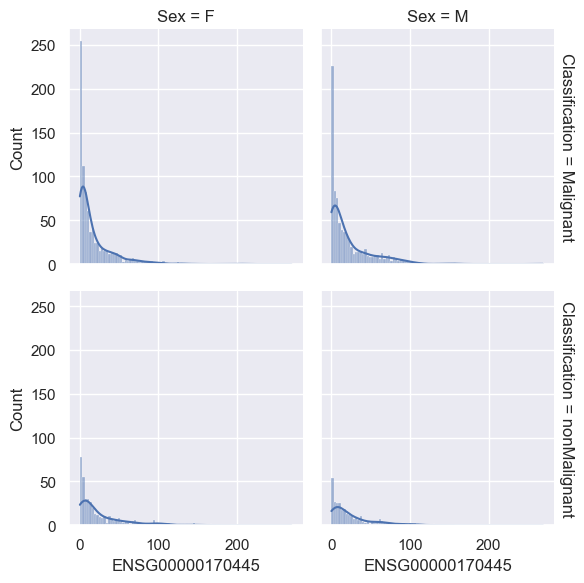

In [40]:
sns.set_theme(style="darkgrid")
graph = sns.displot(
    df_genes_labels, x=column_gene_name, col="Sex", row="Classification",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True), kde=True
)
plt.show()

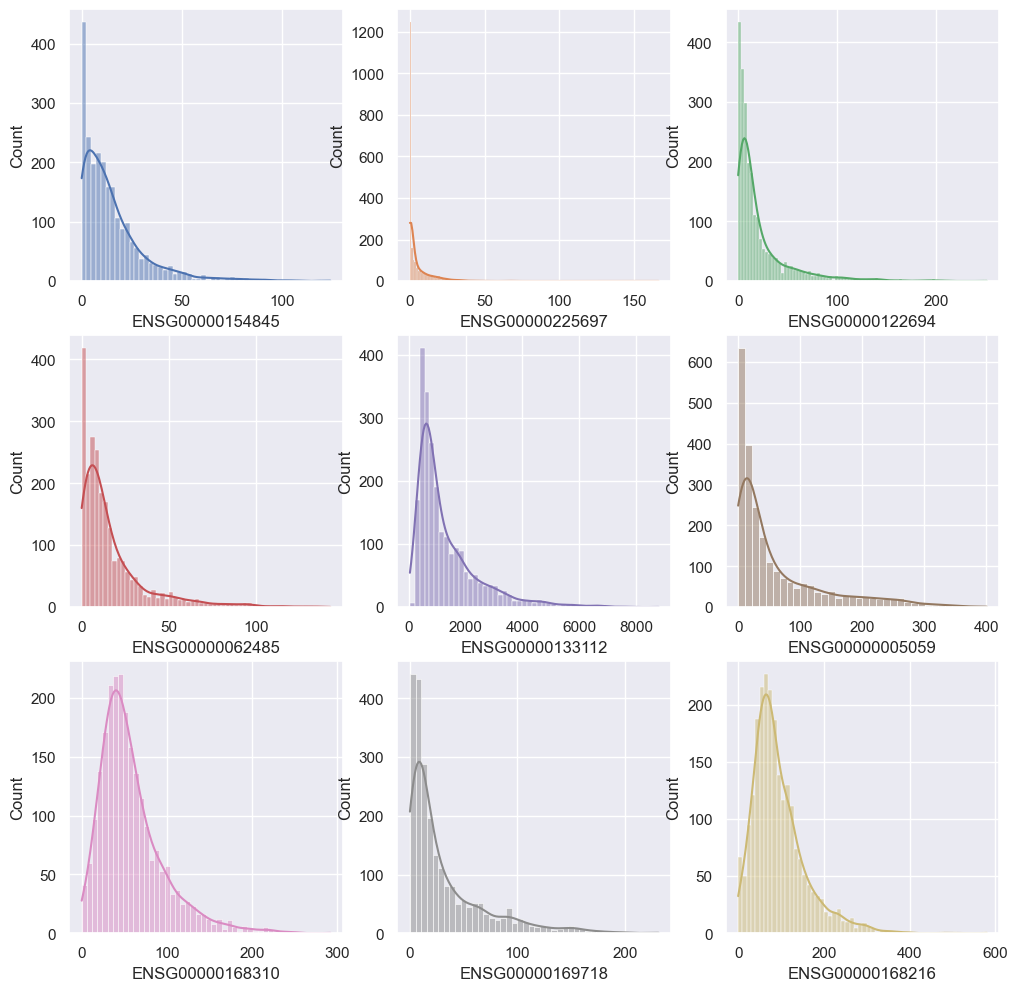

In [41]:
six_random_column = random.sample(df_genes_labels.columns.to_list(), 9)
sns.set(style="darkgrid")
palette = itertools.cycle(sns.color_palette())
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
sns.histplot(data=df_genes_labels, x=six_random_column[0], kde=True, color=next(palette), ax=axs[0, 0])
sns.histplot(data=df_genes_labels, x=six_random_column[1], kde=True, color=next(palette), ax=axs[0, 1])
sns.histplot(data=df_genes_labels, x=six_random_column[2], kde=True, color=next(palette), ax=axs[0, 2])
sns.histplot(data=df_genes_labels, x=six_random_column[3], kde=True, color=next(palette), ax=axs[1, 0])
sns.histplot(data=df_genes_labels, x=six_random_column[4], kde=True, color=next(palette), ax=axs[1, 1])
sns.histplot(data=df_genes_labels, x=six_random_column[5], kde=True, color=next(palette), ax=axs[1, 2])
sns.histplot(data=df_genes_labels, x=six_random_column[6], kde=True, color=next(palette), ax=axs[2, 0])
sns.histplot(data=df_genes_labels, x=six_random_column[7], kde=True, color=next(palette), ax=axs[2, 1])
sns.histplot(data=df_genes_labels, x=six_random_column[8], kde=True, color=next(palette), ax=axs[2, 2])
plt.show()

In [42]:
df_genes_labels.columns[:5440]

Index(['ENSG00000000419', 'ENSG00000000460', 'ENSG00000000938',
       'ENSG00000001036', 'ENSG00000001461', 'ENSG00000001497',
       'ENSG00000001629', 'ENSG00000001631', 'ENSG00000002330',
       'ENSG00000002549',
       ...
       'ENSG00000267279', 'ENSG00000267316', 'ENSG00000268555',
       'ENSG00000269028', 'ENSG00000270055', 'ENSG00000271043',
       'ENSG00000272053', 'ENSG00000272168', 'ENSG00000272369',
       'ENSG00000272888'],
      dtype='object', length=5440)

In [43]:
# The Kolmogorov-Smirnov test tests the null hypothesis that the data was drawn from a normal distribution.
# It is similar in this case to the Shapiro Wilk test, but the main difference with it lies in the number of samples.
# While the Shapiro Wilk test can be used with up to 50 data, the Kolmogorov Smirnov test is recommended for more than 50 observations.

dist_norm_genes = []

for column in df_genes_labels.columns[:5440]:
    kstest_result = kstest(df_genes_labels[column], 'norm')    
    if kstest_result.pvalue > .5:
        dist_norm_genes.append([column, kstest_result.statistic, kstest_result.pvalue])

print(f"Number of genes with pvalues greater than 0.5: {len(dist_norm_genes)}")

Number of genes with pvalues greater than 0.5: 0


#### As the above graphs show, most of the genes do not have a normal distribution. Therefore, to determine correlations between them we will use Spearman's method.

Reference: https://practicaldatascience.co.uk/data-science/how-to-calculate-spearmans-rank-correlation-in-pandas

In [44]:
df_genes_labels[['Classification', 'Patient_group', 'Center',
 'Source', 'Cell_type', 'Group', 'Stage', 'Sex']] = df_genes_labels[['Classification', 'Patient_group', 'Center',
  'Source', 'Cell_type', 'Group', 'Stage', 'Sex']].apply(lambda x: pd.factorize(x)[0])
df_genes_labels.iloc[:, 5440:].head(5)

,Classification,Patient_group,Center,Source,Cell_type,Group,Stage,Sex,Age
Vumc-HD-101-TR922,0,0,0,0,0,0,-1,0,35.0
Vumc-HD-103-TR923,0,0,0,1,0,0,-1,0,54.0
Vumc-HD-108-TR924,0,0,0,2,0,0,-1,0,56.0
Vumc-HD-127-TR925,0,0,0,3,0,0,-1,0,52.0
Vumc-HD-130-TR926,0,0,0,4,0,0,-1,0,57.0


In [45]:
#df_genes_class = df_genes_labels.iloc[:,:5441]
#df_genes_class.head(2)

In [46]:
def calc_corr_and_save (data_frame, corr_file_path, corr_method):
    spearman_path = corr_file_path
    if not os.path.exists(spearman_path):
        corr = data_frame.corr(method=corr_method, numeric_only = False, min_periods=1)
        corr.to_pickle(spearman_path)
    else:
        corr = pd.read_pickle(spearman_path)
    return corr

In [47]:
corr = calc_corr_and_save (df_genes_labels, "Data/spearman_corr.pkl", "spearman")

In [48]:
# Selecting the upper traingular.
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
# Selecting the columns which are having absolute correlation greater than 0.70
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(len(to_drop))

1797


In [49]:
df_to_drop = corr.loc[to_drop][to_drop]
df_to_drop

,ENSG00000003756,ENSG00000004779,ENSG00000005022,ENSG00000005059,ENSG00000005249,ENSG00000005302,ENSG00000005844,ENSG00000005955,ENSG00000006015,ENSG00000007312,...,ENSG00000257923,ENSG00000260017,ENSG00000265148,ENSG00000266714,ENSG00000267316,ENSG00000269028,ENSG00000271043,Group,Stage,Sex
ENSG00000003756,1.000000,0.670025,0.605573,0.713502,-0.382773,0.646083,0.736540,0.683001,0.596499,0.644612,...,-0.212096,0.077429,-0.302887,0.631983,-0.375002,-0.205955,-0.209847,0.068644,-0.034365,0.060637
ENSG00000004779,0.670025,1.000000,0.587776,0.759391,-0.538813,0.690506,0.659638,0.731495,0.700150,0.684739,...,-0.428197,0.076039,-0.480299,0.655300,-0.334571,-0.073955,-0.076806,0.011512,-0.093116,0.097390
ENSG00000005022,0.605573,0.587776,1.000000,0.662270,-0.386254,0.552607,0.635484,0.578773,0.482708,0.590438,...,-0.187548,0.018127,-0.275707,0.503379,-0.287219,-0.259865,-0.262300,0.041035,-0.074821,0.097034
ENSG00000005059,0.713502,0.759391,0.662270,1.000000,-0.492859,0.711326,0.737249,0.743581,0.675682,0.735420,...,-0.334160,0.064092,-0.391611,0.673414,-0.334678,-0.156895,-0.157325,0.045408,-0.093697,0.043292
ENSG00000005249,-0.382773,-0.538813,-0.386254,-0.492859,1.000000,-0.464182,-0.354241,-0.550428,-0.588561,-0.424062,...,0.637580,-0.233922,0.581533,-0.486389,0.287269,0.008275,0.024864,-0.097922,-0.102620,-0.017084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000269028,-0.205955,-0.073955,-0.259865,-0.156895,0.008275,-0.057343,-0.265727,-0.064816,-0.089064,-0.173094,...,-0.235260,-0.288960,-0.131311,-0.140928,0.223921,1.000000,0.961537,-0.030911,-0.065225,-0.007515
ENSG00000271043,-0.209847,-0.076806,-0.262300,-0.157325,0.024864,-0.062322,-0.262689,-0.072565,-0.089446,-0.173003,...,-0.226368,-0.284540,-0.126327,-0.144535,0.233234,0.961537,1.000000,-0.047913,-0.085996,-0.007358
Group,0.068644,0.011512,0.041035,0.045408,-0.097922,0.021326,0.099471,0.019412,0.025863,0.003102,...,0.073685,0.035633,0.044462,0.045682,-0.117753,-0.030911,-0.047913,1.000000,0.176135,-0.000586
Stage,-0.034365,-0.093116,-0.074821,-0.093697,-0.102620,-0.047743,-0.049519,-0.008188,-0.015467,-0.108833,...,0.072189,0.171904,0.061713,-0.007057,-0.155279,-0.065225,-0.085996,0.176135,1.000000,-0.025882


In [50]:
#plt.figure(figsize=(14,8))
#sns.heatmap(df_to_drop.loc[df_to_drop.index.to_list(), df_to_drop.index.to_list()], annot=True, cmap='Blues')
#plt.show()

In [51]:
# droping the columns which are in the list 'to_drop' from the dataframe upper_tri
df_genes_labels_clean = df_genes_labels.drop(to_drop, axis=1, inplace=False)
print(df_genes_labels_clean.shape)

(2348, 3652)


In [52]:
corr_class = corr["Classification"].sort_values(ascending=False)
corr_class

Classification     1.000000
Stage              0.703486
Age                0.338889
ENSG00000185825    0.334687
ENSG00000172757    0.321762
                     ...   
ENSG00000227165   -0.303941
ENSG00000240225   -0.313051
ENSG00000111196   -0.324033
Center                  NaN
Cell_type               NaN
Name: Classification, Length: 5449, dtype: float64

In [53]:
threshold_p_value = .3
corr_class = corr_class.loc[(corr_class > threshold_p_value) | (corr_class < threshold_p_value * -1)]
print(len(corr_class))
corr_class

13


Classification     1.000000
Stage              0.703486
Age                0.338889
ENSG00000185825    0.334687
ENSG00000172757    0.321762
ENSG00000213465    0.310960
ENSG00000142089    0.306184
ENSG00000130429    0.300404
ENSG00000005961    0.300390
ENSG00000130948   -0.301538
ENSG00000227165   -0.303941
ENSG00000240225   -0.313051
ENSG00000111196   -0.324033
Name: Classification, dtype: float64

In [54]:
corr_group = corr["Patient_group"].sort_values(ascending=False)
corr_group

Patient_group      1.000000
Group              0.998096
Source             0.374060
Stage              0.177692
ENSG00000107521    0.174367
                     ...   
ENSG00000136238   -0.145926
ENSG00000163737   -0.152129
ENSG00000198668   -0.195437
Center                  NaN
Cell_type               NaN
Name: Patient_group, Length: 5449, dtype: float64

In [55]:
corr_group = corr_group.loc[(corr_group > threshold_p_value) | (corr_group < threshold_p_value * -1)]
print(len(corr_group))
corr_group

3


Patient_group    1.000000
Group            0.998096
Source           0.374060
Name: Patient_group, dtype: float64

In [56]:

tmp_headmap = corr.loc[corr_class.index.to_list(), corr_class.index.to_list()]
tmp_headmap.head(13)

,Classification,Stage,Age,ENSG00000185825,ENSG00000172757,ENSG00000213465,ENSG00000142089,ENSG00000130429,ENSG00000005961,ENSG00000130948,ENSG00000227165,ENSG00000240225,ENSG00000111196
Classification,1.000000,0.703486,0.338889,0.334687,0.321762,0.310960,0.306184,0.300404,0.300390,-0.301538,-0.303941,-0.313051,-0.324033
Stage,0.703486,1.000000,0.299886,0.250854,0.210744,0.230030,0.249083,0.204591,0.191509,-0.237184,-0.180250,-0.234342,-0.232904
Age,0.338889,0.299886,1.000000,0.204512,0.225737,0.199373,0.173477,0.167985,0.190072,-0.230073,-0.227641,-0.205621,-0.229247
ENSG00000185825,0.334687,0.250854,0.204512,1.000000,0.644314,0.518477,0.288939,0.710509,0.646289,-0.212796,-0.164630,-0.203542,-0.285916
ENSG00000172757,0.321762,0.210744,0.225737,0.644314,1.000000,0.582315,0.302430,0.720536,0.558729,-0.329684,-0.321461,-0.347118,-0.453727
ENSG00000213465,0.310960,0.230030,0.199373,0.518477,0.582315,1.000000,0.386168,0.539543,0.428921,-0.346038,-0.354478,-0.365581,-0.424434
ENSG00000142089,0.306184,0.249083,0.173477,0.288939,0.302430,0.386168,1.000000,0.219059,0.150341,-0.468860,-0.498525,-0.490594,-0.477611
ENSG00000130429,0.300404,0.204591,0.167985,0.710509,0.720536,0.539543,0.219059,1.000000,0.804844,-0.147530,-0.070139,-0.126450,-0.264353
ENSG00000005961,0.300390,0.191509,0.190072,0.646289,0.558729,0.428921,0.150341,0.804844,1.000000,-0.137097,-0.073850,-0.048773,-0.268983
ENSG00000130948,-0.301538,-0.237184,-0.230073,-0.212796,-0.329684,-0.346038,-0.468860,-0.147530,-0.137097,1.000000,0.624625,0.536066,0.609640


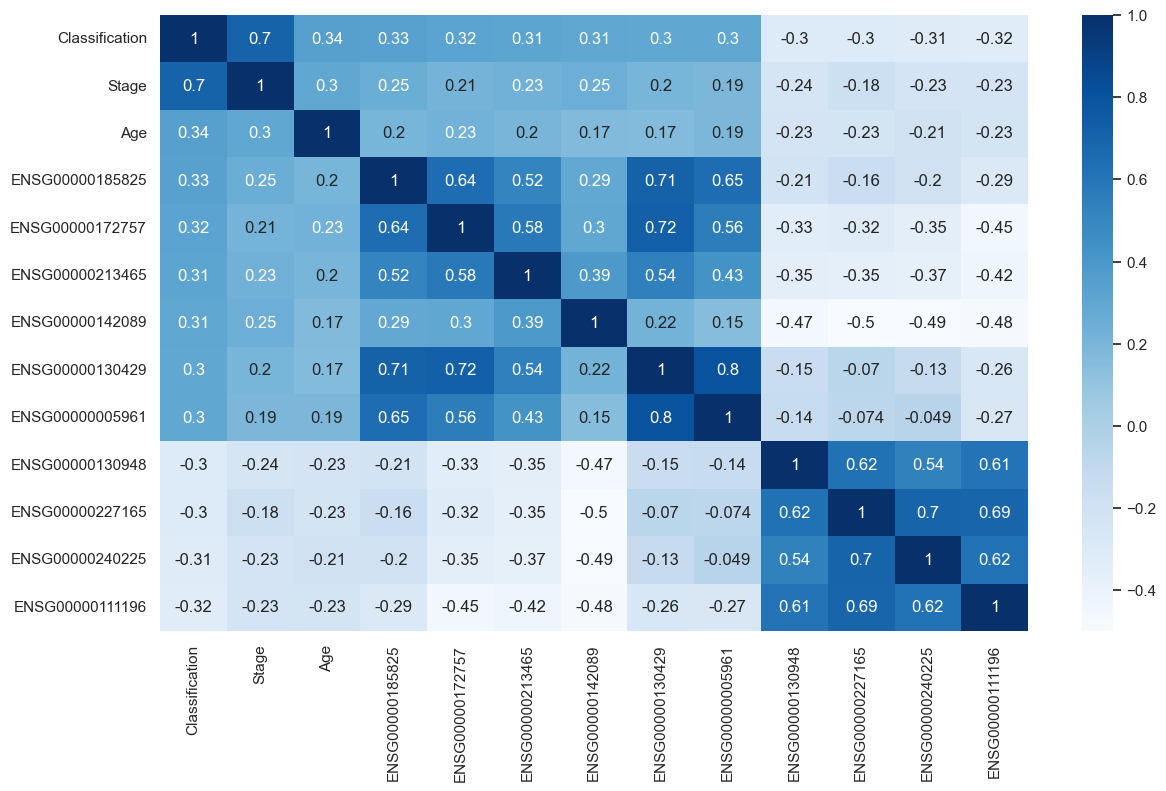

In [57]:
# Heatmapswith the 13 (over .3 in spearman p_value) variables correlated with classification
plt.figure(figsize=(14,8))
sns.heatmap(corr.loc[corr_class.index.to_list(), corr_class.index.to_list()], annot=True, cmap='Blues')
plt.show()

In [58]:
#Remove Nan values
df_genes_labels.isna().sum()

ENSG00000000419     0
ENSG00000000460     0
ENSG00000000938     0
ENSG00000001036     0
ENSG00000001461     0
                   ..
Cell_type           0
Group               0
Stage               0
Sex                 0
Age                23
Length: 5449, dtype: int64

In [59]:
df_genes_labels_tmp = df_genes_labels.drop(['Age'], axis=1)
df_genes_labels_tmp.isna().sum().sum()

0

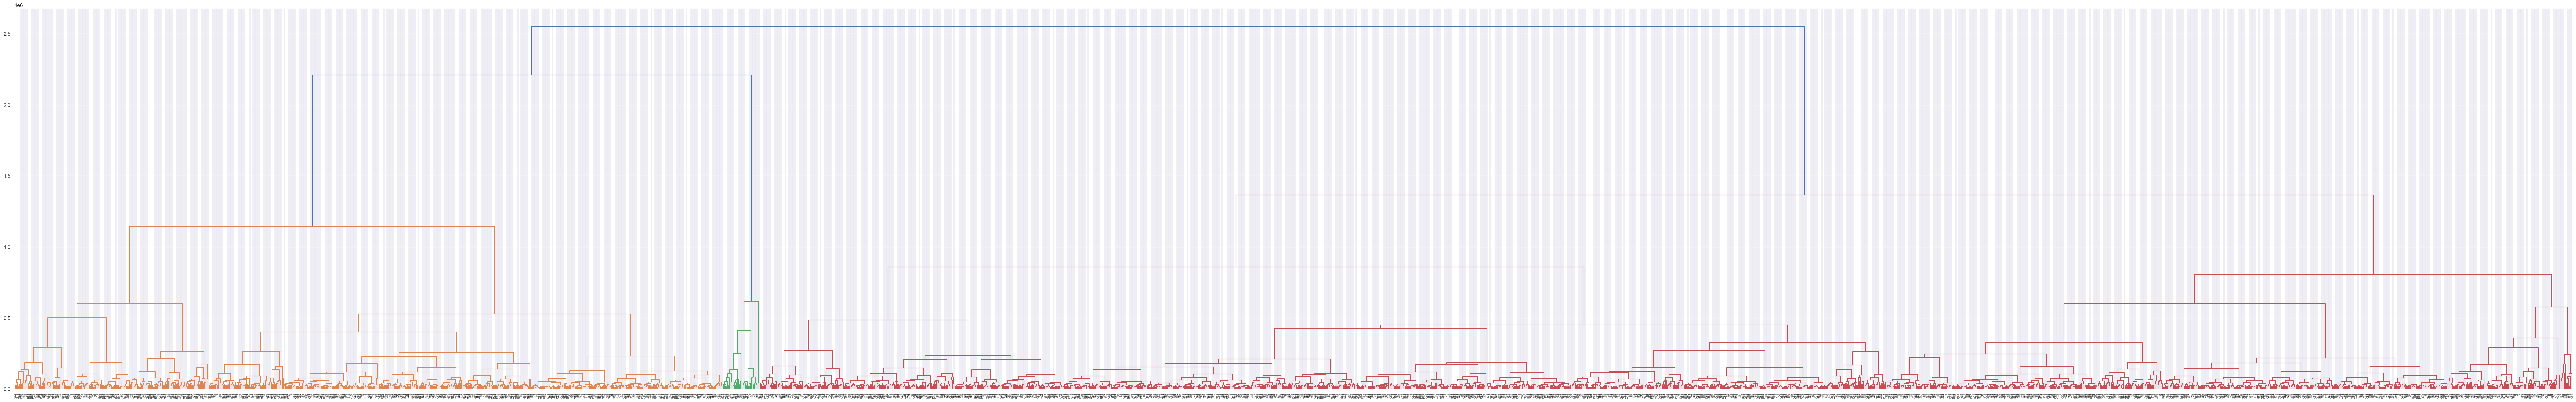

In [60]:
linked = linkage(df_genes_labels_tmp, 'ward')
plt.figure(figsize=(100, 15))
dendrogram(linked,
            orientation='top',
            #labels=target,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#### Reduces the dimension of the input features (genes)


##### First attempt

Feature selection using MI-SVM, RFE-SVM, and Random Forest models

<img title="Model diagram" alt="Alt text" src="Resources/images/FS_MI.png">

References:  
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0269126   
https://www.sciencedirect.com/science/article/pii/S1877050915004469

In [61]:
gene_expression = df_genes_labels.iloc[:, :5440]
gene_expression = np.asarray(gene_expression.values)
class_labels = df_genes_labels.iloc[:, 5440:5441].to_numpy().flatten()
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)

In [62]:
#filter technique (Mutual Information [MI])
mi = mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=3, copy=True, random_state=42)

In [63]:
# Remove zero values
gains = np.asarray(mi)
indexes = np.where(gains != 0)[0]
print(len(indexes))
gains.shape

3839


(5440,)

In [64]:
# Estimate best hyperparams to SVC
# defining parameter range
param_grid = {'C': [1, 10, 100, 1000], 'tol': [0.1, 0.01, 0.001, 0.0001, 1e-4, 1e-5, 1e-6],
               'dual':[True], 'multi_class':['ovr', 'crammer_singer'],  'class_weight': ('balanced', 'None')}   
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 1, scoring='roc_auc')

it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-100:]
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)
x_train = X_train[:, it]
Y_train = y_train[:]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    grid.fit(x_train, Y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


In [ ]:
# print best score
print(grid.best_score_)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

0.7434265912692309
{'C': 1000, 'class_weight': 'balanced', 'dual': True, 'multi_class': 'ovr', 'tol': 0.0001}
LinearSVC(C=1000, class_weight='balanced')


In [ ]:
def get_svc_model():
    return LinearSVC(random_state=42, dual=True, C=1000, tol=0.00001, lass_weight='balanced')

In [ ]:
def split_df():
    X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test

In [ ]:
# Traingin a linearSVC model with different numbers of MI features starting from the top 2 to the top 1000
# the highest accuracy corresponds to the best number of features
graph_MI = []
X_train, X_test, y_train, y_test = split_df()

TotalTime = time.time()
for i in range (2,500):  
    it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-i:]
    x_train = X_train[:, it]
    x_test = X_test[:, it]
    Y_train = y_train[:]
    Y_test = y_test[:]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    clf = get_svc_model()
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        clf.fit(x_train, Y_train)
    scores = clf.score(x_test, Y_test)
    endTime = time.time()
    y_pred = clf.predict(x_test)
    graph_MI.append(scores)
EndTime = time.time()
print('TotalTime: ' + str(EndTime - TotalTime))

TotalTime: 333.5657341480255


Text(0, 0.5, 'Accuracy')

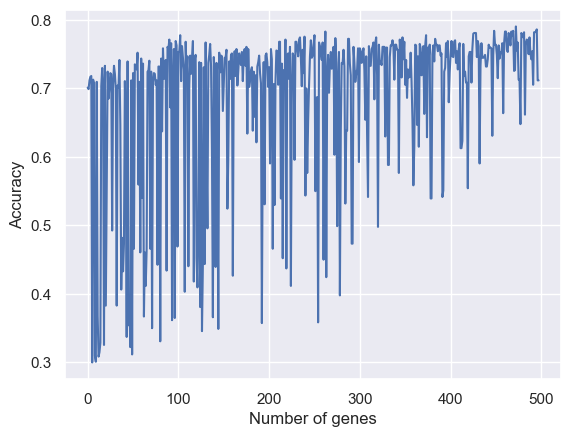

In [ ]:
#Plot a graph with all accuracy scores
plt.plot(graph_MI)
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

In [ ]:
#Display the best number of features
graph_MI = np.asarray(graph_MI)
print(np.argmax(graph_MI))
print(graph_MI[np.argmax(graph_MI)]) 
print(np.where(graph_MI == graph_MI[np.argmax(graph_MI)]))

#Since the counting started from 2 in the for loop, 2 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 19 not 17

472
0.7904255319148936
(array([472], dtype=int64),)


In [ ]:
graph_MI[np.argmax(graph_MI)]
print(f"The higest accuracy is with {np.argmax(graph_MI)} features because the list starts from 2")

The higest accuracy is with 472 features because the list starts from 2


In [ ]:
#trying the LinearSVC model in case of all MI features
X_train, X_test, y_train, y_test = split_df()

it = sorted(range(len(indexes)), key = lambda sub: gains[sub])[:]
startTime = time.time()
x_train = X_train[:, it]
x_test = X_test[:, it]
Y_train = y_train[:]
Y_test = y_test[:]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
clf = get_svc_model()
clf.fit(x_train, Y_train)
scores = clf.score(x_test, Y_test)
endTime = time.time()
y_pred = clf.predict(x_test)
print('Score: ' + str(scores))
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print('Time: ' + str(endTime - startTime))

Score: 0.798936170212766
0.798936170212766
[[196  85]
 [104 555]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       281
           1       0.87      0.84      0.85       659

    accuracy                           0.80       940
   macro avg       0.76      0.77      0.76       940
weighted avg       0.80      0.80      0.80       940

0.798936170212766
Time: 8.68615984916687


c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
#Wrapper Technique (Random Forest [RF])
#making a for loop to find the best number of estimators (trees) based on accuracy
scores = []
start_time = time.time()
for i in range (1, 500):
  regressor = RandomForestClassifier(n_estimators=i, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  sorted_features = sorted (zip(map(lambda x: round(x, 4), regressor.feature_importances_),
                                 range(len(class_labels))), reverse=True)
  important_f = []  

  for s in sorted_features:
    if s[0] != 0:
      important_f.append(s[1])
  important_f = np.transpose(important_f)
  important_f = np.asarray(important_f)
    
    
  #checking the similarities in the first 19 features in MI with features used in RF (n_estimators = i)
  it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-19:]
  similarity = []
  count = 0
  for f in important_f:
    for t in it:
      if (f == t):
        count = count + 1
        similarity.append(f)
  scores.append(accuracy_score(y_test, y_pred))
endTime = time.time()
print("Total Time: ", str(endTime - start_time))

Total Time:  12168.671781778336


Text(0, 0.5, 'Accuracy')

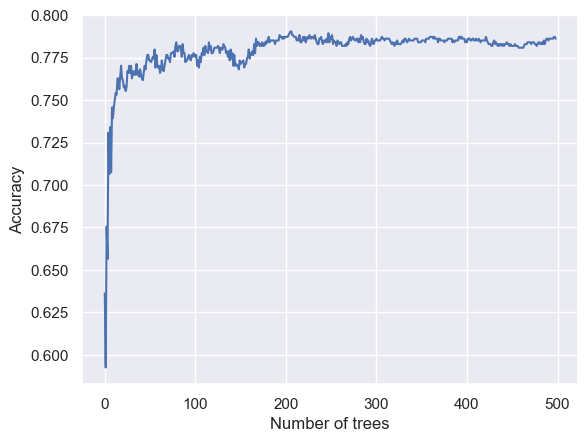

In [ ]:
#Plot a graph with all accuracy scores
plt.plot(scores)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')

In [ ]:
#Display the best number of trees
scores = np.asarray(scores)
print(np.argmax(scores))
print(scores[np.argmax(scores)]) 
print(np.where(scores == scores[np.argmax(scores)]))

#Since the counting started from 1 not zero in the for loop, 1 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 9 not 8

205
0.7904255319148936
(array([205, 206], dtype=int64),)


In [ ]:
#To get the common features between top 19 MI features and the features of the 345 trees in the Random forest
ST = time.time()
regressor = RandomForestClassifier(n_estimators=345, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
sorted_features = sorted (zip(map(lambda x: round(x, 4), regressor.feature_importances_), range(len(class_labels))),reverse=True)
important_f = []

for s in sorted_features:
    if s[0] != 0:
        important_f.append(s[1])
important_f = np.transpose(important_f)
important_f = np.asarray(important_f)

#checking the similarities in the first 19 features in MI with features used in RF (n_estimators = 345)
it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-19:]
similarity = []
count = 0
for f in important_f:
    for t in it:
        if (f == t):
            count = count + 1
            similarity.append(f)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average = 'weighted'))
print("the number of important features used: ", len(important_f))
print ("number of similar features: ", len(similarity))  

ET = time.time()
print("time: ", ET - ST)
print("\n")

0.7861702127659574
[[102 179]
 [ 22 637]]
              precision    recall  f1-score   support

           0       0.82      0.36      0.50       281
           1       0.78      0.97      0.86       659

    accuracy                           0.79       940
   macro avg       0.80      0.66      0.68       940
weighted avg       0.79      0.79      0.76       940

(0.7931756513518242, 0.7861702127659574, 0.7561042860386531, None)
the number of important features used:  2092
number of similar features:  9
time:  39.654001235961914




In [ ]:
#The wrapper technique (Recursive Feature Elimination [RFE])
X_train, X_test, y_train, y_test = split_df()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
graph_RFE = []
Total_time = time.time()
for i in range(1, 1000):
    startTime = time.time()
    estimator = get_svc_model()
    selector = RFE(estimator, n_features_to_select= i, step=0.5)
    selector = selector.fit(X_train, y_train)
    # testing the model
    y_pred = selector.predict(X_test)
    graph_RFE.append(selector.score(X_test, y_test))
EndTime = time.time()
print('TotalTime: ' + str(EndTime - Total_time))

Text(0, 0.5, 'Accuracy')

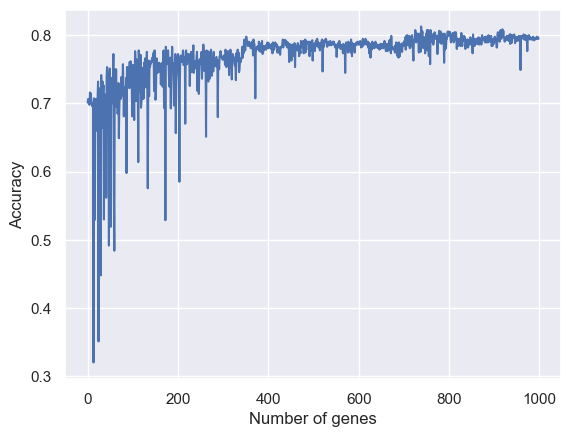

In [ ]:
#Plot a graph with all accuracy scores
plt.plot(graph_RFE)
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

In [ ]:
#Display the best number of features
graph_RFE = np.asarray(graph_RFE)
print(np.argmax(graph_RFE))
print(graph_RFE[np.argmax(graph_RFE)])
print(np.count_nonzero(np.where(graph_RFE == graph_RFE[np.argmax(graph_RFE)])))
print(np.where(graph_RFE == graph_RFE[np.argmax(graph_RFE)]))

#Since the counting started from 1 not zero in the for loop, 1 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 76 not 75

738
0.8127659574468085
1
(array([738], dtype=int64),)


In [ ]:
#The wrapper method (recursive feature elimination RFE) 76 features only
X_train, X_test, y_train, y_test = split_df()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

startTime = time.time()
estimator = get_svc_model()
selector = RFE(estimator, n_features_to_select= 738, step=0.5)
selector = selector.fit(X_train, y_train)
endTime = time.time()
print('Time: ' + str(endTime - startTime))
# testing the model
y_pred = selector.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(selector.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average = 'weighted'))

print(np.count_nonzero(selector.support_ == 1))

(1408, 5440)
(1408,)
(940, 5440)
(940,)


c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Time: 22.864683628082275
0.7755319148936171
0.7755319148936171
[[199  82]
 [129 530]]
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       281
           1       0.87      0.80      0.83       659

    accuracy                           0.78       940
   macro avg       0.74      0.76      0.74       940
weighted avg       0.79      0.78      0.78       940

(0.7884972026347297, 0.7755319148936171, 0.7800433800781879, None)
738


c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
#Create a list with indices of RFE Features
RFE_features = np.where(selector.support_ == 1)
RFE_features = np.asarray(RFE_features)
rfe_f = []
for i in RFE_features:
  for s in i:
    rfe_f.append(s)
rfe_f = np.asarray(rfe_f)

In [ ]:
#Create list with common features among techniques
similar_all = []
similar_rfe_RF = []
similar_rfe_MI = []

count = 0
for f in it:
  for t in rfe_f:
    if (f == t):
      count = count + 1
      similar_rfe_MI.append(f)
print("number of similar features between RFE and MI: ", count)

count = 0
for f in important_f:
  for t in rfe_f:
    if (f == t):
      count = count + 1
      similar_rfe_RF.append(f)
print("number of similar features between RFE and RF: ", count)

count = 0
for f in similarity:
  for t in rfe_f:
    if (f == t):
      count = count + 1
      similar_all.append(f)
print("number of similar features between RF and MI: ", len(similarity))
print("number of similar features between RFE, RF and MI: ", count)

number of similar features between RFE and MI:  8
number of similar features between RFE and RF:  302
number of similar features between RF and MI:  9
number of similar features between RFE, RF and MI:  3


In [ ]:
#A LinearSVC Model using the similar features between all of them
startTime = time.time()
X_train, X_test, y_train, y_test = split_df()

X_train = X_train[:, similar_all]
X_test = X_test[:, similar_all]
Y_train = y_train[:]
Y_test = y_test[:]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train[:]
Y_test = Y_test[:]
clf = get_svc_model()

clf.fit(X_train, Y_train)

endTime = time.time()
print('Score: ' + str(clf.score(X_test, Y_test)))
print('Time: ' + str(endTime - startTime))
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average = 'weighted'))

Score: 0.701063829787234
Time: 0.2781791687011719
[[  0 281]
 [  0 659]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       281
           1       0.70      1.00      0.82       659

    accuracy                           0.70       940
   macro avg       0.35      0.50      0.41       940
weighted avg       0.49      0.70      0.58       940

0.701063829787234
(0.4914904934359438, 0.701063829787234, 0.5778624938458877, None)


c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parame

In [ ]:
#Create a list with common features between at least two techniques
common = []
zzz = []
zzz = similar_all + similar_rfe_MI + similar_rfe_RF + similarity
for i in zzz:
  if i in common:
    pass
  else:
    common.append(i)
print ("Number of common features between at least two techniques: ",len(common))

Number of common features between at least two techniques:  313


In [ ]:
#A LinearSVC Model using the common features between at least two techniques
X_train, X_test, y_train, y_test = split_df()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

startTime = time.time()
X_train = X_train[:, common]
X_test = X_test[:, common]
Y_train = y_train[:]
Y_test = y_test[:]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train[:]
Y_test = Y_test[:]
clf = get_svc_model()
clf.fit(X_train, Y_train)
endTime = time.time()
print('Score: ' + str(clf.score(X_test, Y_test)))
print('Time: ' + str(endTime - startTime))
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average = 'weighted'))

(1408, 5440)
(1408,)
(940, 5440)
(940,)
Score: 0.7638297872340426
Time: 0.7852435111999512
[[183  98]
 [124 535]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       281
           1       0.85      0.81      0.83       659

    accuracy                           0.76       940
   macro avg       0.72      0.73      0.73       940
weighted avg       0.77      0.76      0.77       940

0.7638297872340426
(0.7707195236204252, 0.7638297872340426, 0.7666749118460375, None)


c:\Users\Edel\.virtualenvs\Desarrollo-OyWcDdAp\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



##### Second attempt

Feature selection based on Maximum Relevance — Minimum Redundanc (MRMR)


References:
https://towardsdatascience.com/mrmr-explained-exactly-how-you-wished-someone-explained-to-you-9cf4ed27458b

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9124963/  
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6241732/  
https://www.frontiersin.org/articles/10.3389/fgene.2022.873218/full  
https://github.com/smazzanti/mrmr

https://github.com/helenzhao093/MLMethods
https://arxiv.org/pdf/1908.05376.pdf

https://github.com/aleromualdi/mRMR
https://ieeexplore.ieee.org/document/1453511

In [ ]:
#Selecting best features with MRMR for binary cancer/non-cancer classification
from mrmr import mrmr_classif

gene_expression = df_genes_labels.iloc[:, :5440]
class_labels = df_genes_labels.iloc[:, 5440:5441] #Classification column
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)

print(type(gene_expression))
print(type(class_labels))

selected_features = mrmr_classif(X=gene_expression, y=class_labels, K=10)



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


100%|██████████| 10/10 [00:21<00:00,  2.14s/it]


In [ ]:
# Trying the LinearSVC model with mrmr selected features for binary cancer/non-cancer classification
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)

startTime = time.time()
x_train = X_train[selected_features]
x_test = X_test[selected_features]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

startTime = time.time()
clf = LinearSVC(random_state=42)
clf.fit(x_train, y_train)
scores = clf.score(x_test, y_test)
endTime = time.time()
y_pred = clf.predict(x_test)
print('Score: ' + str(scores))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print('Time: ' + str(endTime - startTime))

Score: 0.7117021276595744
0.7117021276595744
[[228  53]
 [218 441]]
              precision    recall  f1-score   support

           0       0.51      0.81      0.63       281
           1       0.89      0.67      0.76       659

    accuracy                           0.71       940
   macro avg       0.70      0.74      0.70       940
weighted avg       0.78      0.71      0.72       940

0.7117021276595744
Time: 1.5228095054626465


In [ ]:
#Selecting best features with MRMR for multi-class classification by 18 types of cancer
gene_expression = df_genes_labels.iloc[:, :5440]
class_labels = df_genes_labels.iloc[:, 5441:5442] #Patient_group column
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)

print(type(gene_expression))
print(type(class_labels))

selected_features = mrmr_classif(X=gene_expression, y=class_labels, K=10)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


100%|██████████| 10/10 [00:19<00:00,  2.00s/it]


In [ ]:
# Trying the LinearSVC model with mrmr selected features for  multi-class classification Patient_group
X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)

startTime = time.time()
x_train = X_train[selected_features]
x_test = X_test[selected_features]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

startTime = time.time()
clf = LinearSVC(random_state=42)
clf.fit(x_train, y_train)
scores = clf.score(x_test, y_test)
endTime = time.time()
y_pred = clf.predict(x_test)
print('Score: ' + str(scores))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print('Time: ' + str(endTime - startTime))

Score: 0.16063829787234044
0.16063829787234044
[[16  0 26  0  1  0  0 45  2  0  0  0  0  0  0  0  0  0  0  0 25  0  0  0
   0 42  0  0]
 [ 7  5  9  0  2  0  0  6  1  0  0  0  0  0  0  0  2  0  0  0  2  0  0  0
   0 19  0  0]
 [ 4  1 81  0  4  1  0 36  0  0  0  0  0  0  0  0  0  0  0  0  6  0  1  0
   0 75  0  0]
 [ 1  0 15  0  0  0  0  7  1  1  0  0  0  0  0  0  0  0  0  0  6  0  0  0
   0 20  0  0]
 [ 1  1  0  0  3  0  0 25  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  6  0  0]
 [ 2  0  4  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0
   0 29  0  0]
 [ 3  0  7  0  0  0  0  7  0  0  0  0  0  0  0  0  2  0  0  0  2  0  0  0
   0  6  0  0]
 [ 0  0 17  0  2  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  6  0  0]
 [ 3  0  7  0  0  0  0 10  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0 12  0  0]
 [ 0  0  4  0  1  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  4  0  0]
 [ 0  0  7  0  0  0  0  2  0  0  0  0  0  0  0  0  0  1  0  0  

#### DBSCAN analysis

References:  
https://ideasbyjin.github.io/post/2019-12-18-clustering-2/   
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc


In [ ]:
#Check tha range of the TPM values
#df_genes_labels_t = df_genes_labels.T
vals = df_genes_labels[df_genes_labels.columns[:5440]].astype(float).values
vals

array([[  4.09505663,   1.74127368,   8.33003273, ...,  10.77954796,
         61.4332114 ,  26.59938027],
       [ 76.1705101 ,   2.56239992, 137.29180289, ...,   4.97657133,
        102.24897006,  39.45589764],
       [ 92.72547237,   8.92231384, 226.2888137 , ...,   4.53841505,
         99.24248155,  37.38394833],
       ...,
       [ 46.83442887,  87.12652815, 359.46439631, ...,   0.        ,
         26.91956436,  30.42123455],
       [116.90001816,   5.82509471, 278.66515283, ...,   1.88553701,
         18.8977417 ,  28.47458823],
       [  0.        ,   3.00010742,  66.97662491, ...,  29.13333012,
         58.39759655,  36.66327662]])

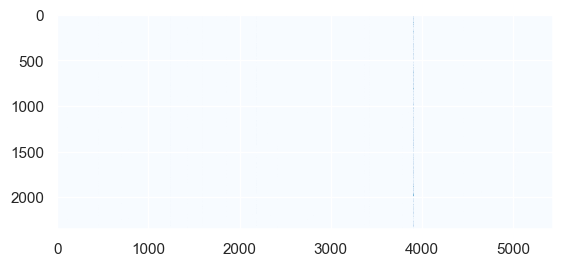

In [ ]:
# Let's plot a heatmap first, as it's a matrix
plt.imshow(vals, interpolation='nearest', cmap = 'Blues')

Min: 0.0, Max: 618101.8118407038, Mean: 183.82352941176453, Median: 20.400353042395704


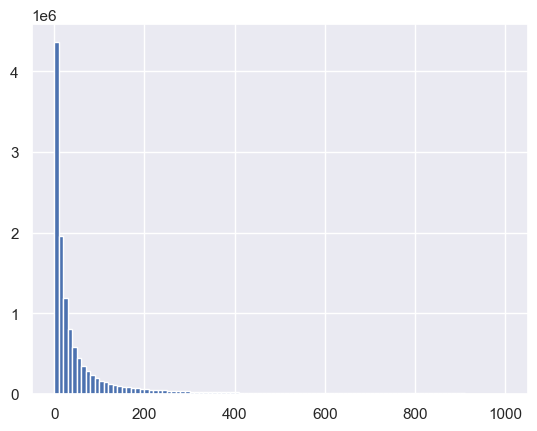

In [ ]:
# Flatten to a 1-dimensional vector.
valarray = vals.flatten()

min_tpm = np.min(valarray)
max_tpm = np.max(valarray)
mean_tpm = np.mean(valarray)
median_tpm = np.median(valarray)

# Draw the histogram
o = plt.hist(valarray, bins = np.arange(0, 1001, 10))

print("Min: {}, Max: {}, Mean: {}, Median: {}".format(min_tpm, max_tpm, mean_tpm, median_tpm))

Min: 0.0, Max: 13.334410084804958, Mean: 3.101345797776536, Median: 3.063407419199928


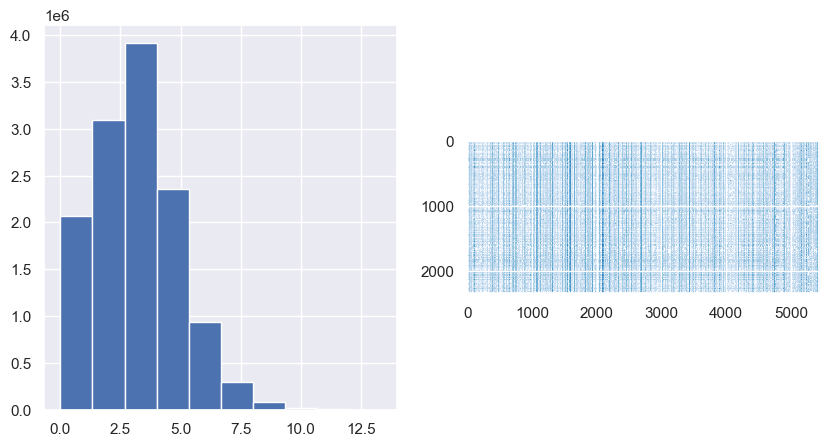

In [ ]:
logTpm = np.log(vals+1)

logTpmArray = logTpm.flatten()

min_tpm = np.min(logTpmArray)
max_tpm = np.max(logTpmArray)
mean_tpm = np.mean(logTpmArray)
median_tpm = np.median(logTpmArray)
print("Min: {}, Max: {}, Mean: {}, Median: {}".format(min_tpm, max_tpm, mean_tpm, median_tpm))

fig, ax = plt.subplots(1,2)
ax[0].hist(logTpmArray)
ax[1].imshow(logTpm, interpolation='nearest', cmap = 'Blues')

fig.set_size_inches((10,5))

In [ ]:
# pairwise distances - use default of Euclidean though there are various ways of doing this
# This will take a while since there's ~3000 pairwise distances to compute.
dmat = pdist(logTpm)

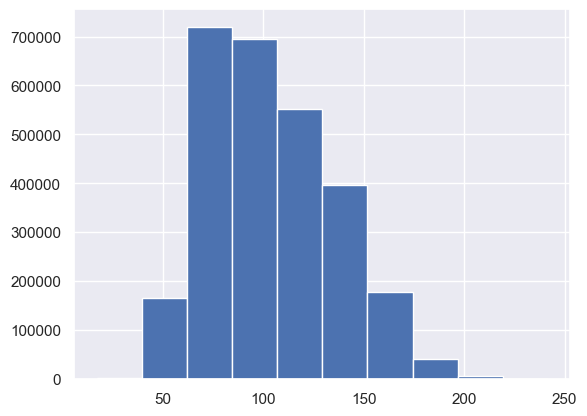

In [ ]:
# Let's look at the distribution of distances
o = plt.hist(dmat)

In [ ]:
# Convert distance matrix from pdist into a square matrix
sqmat = squareform(dmat)

In [ ]:
# Initialise an MDS object, this allows us to visualise points in space
mds = MDS(dissimilarity='precomputed')

In [ ]:
# This step can take a while
mds_coords_path = 'Data/mds_coords.npy'
if not os.path.exists(mds_coords_path):
    np.random.seed(0)
    coords = mds.fit_transform(sqmat)
    np.save(mds_coords_path, coords)
else:
    coords = np.load(mds_coords_path)

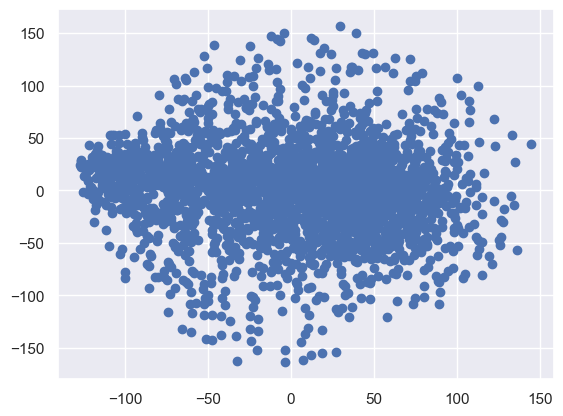

In [ ]:
plt.scatter(coords[:,0], coords[:,1])
plt.show()

In [ ]:
def fit_dbscan(metric, eps, min_samples):
    dbscan = DBSCAN(metric=metric, eps = eps, min_samples = min_samples)
    dbscan.fit(sqmat)

    print(dbscan.labels_.shape)

    print(set(dbscan.labels_))

    unique, counts = np.unique(dbscan.labels_, return_counts=True)
    print( dict(zip(unique, counts)) )
    return dbscan

In [ ]:
THRESHOLD = 75
min_samples = 4
dbscan = fit_dbscan('precomputed', THRESHOLD, min_samples)

(2348,)
{0, -1}
{-1: 385, 0: 1963}


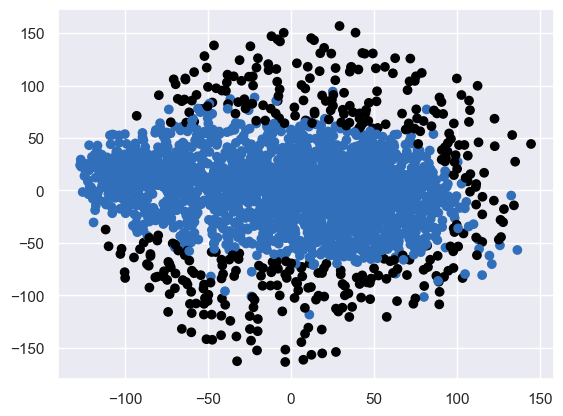

In [ ]:
# Colour points based on cluster membership
cols = {0: '#316fba', -1:'black'}
colours = [ cols[c] for c in dbscan.labels_ ]

# Now let's see what the clusters look like
plt.scatter(coords[:,0], coords[:,1], c = colours)
plt.show()

In [ ]:
sample_ids_used = df_genes_labels.index
sample_id_to_smts = df_genes_labels['Classification']
class_represented = {0: set(), -1: set()}

for i, label in enumerate(dbscan.labels_):        
    sample_id = sample_ids_used[i]
    class_sample = sample_id_to_smts[sample_id]
    
    class_represented[label].add(class_sample)

In [ ]:
class_represented

{0: {0, 1}, -1: {0, 1}}

#### Reduces the dimension of the input features (genes). Data without outliers.

In [ ]:
# Remove outliers
outliers_index = np.where(dbscan.labels_ == -1)[0]
print(len(outliers_index))
df_genes_labels_clean = df_genes_labels.drop(df_genes_labels.index[outliers_index])

385


In [ ]:
df_genes_labels_clean.shape

(1963, 5449)

In [ ]:
# Select feature without outliers

gene_expression = df_genes_labels_clean.iloc[:, :5440]
gene_expression = np.asarray(gene_expression.values)
class_labels = df_genes_labels_clean.iloc[:, 5440:5441].to_numpy().flatten()
#splitting the data into train-test
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)

In [ ]:
#filter technique (Mutual Information [MI])
mi = mutual_info_classif(X_train, y_train, discrete_features='auto', n_neighbors=3, copy=True, random_state=42)

In [79]:
# Remove zero values
gains = np.asarray(mi)
indexes = np.where(gains != 0)[0]
print(len(indexes))
gains.shape

3527


(5440,)

In [80]:
# Estimate best hyperparams to SVC
# defining parameter range
param_grid = {'C': [1, 10, 100, 1000], 'tol': [0.1, 0.01, 0.001, 0.0001, 1e-4, 1e-5, 1e-6],
               'dual':[True], 'multi_class':['ovr', 'crammer_singer'],  'class_weight': ('balanced', 'None')}   
grid = GridSearchCV(LinearSVC(), param_grid, refit = True, verbose = 1, scoring='roc_auc')

it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-100:]
X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)
x_train = X_train[:, it]
Y_train = y_train[:]

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    grid.fit(x_train, Y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


In [81]:
# print best score
print(grid.best_score_)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

0.7910124797413773
{'C': 10, 'class_weight': 'balanced', 'dual': True, 'multi_class': 'ovr', 'tol': 0.0001}
LinearSVC(C=10, class_weight='balanced')


In [82]:
def get_svc_model():
    return LinearSVC(random_state=42, dual=True, C=1000, tol=0.00001, lass_weight='balanced')

In [83]:
def split_df():
    X_train, X_test, y_train, y_test = train_test_split(gene_expression, class_labels, test_size=0.40, random_state=42, stratify=class_labels)
    return X_train, X_test, y_train, y_test

In [84]:
# Traingin a linearSVC model with different numbers of MI features starting from the top 2 to the top 1000
# the highest accuracy corresponds to the best number of features
graph_MI = []
X_train, X_test, y_train, y_test = split_df()

TotalTime = time.time()
for i in range (2,500):  
    it = sorted(range(len(gains)), key = lambda sub: gains[sub])[-i:]
    x_train = X_train[:, it]
    x_test = X_test[:, it]
    Y_train = y_train[:]
    Y_test = y_test[:]
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    clf = get_svc_model()
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        clf.fit(x_train, Y_train)
    scores = clf.score(x_test, Y_test)
    endTime = time.time()
    y_pred = clf.predict(x_test)
    graph_MI.append(scores)
EndTime = time.time()
print('TotalTime: ' + str(EndTime - TotalTime))

TypeError: LinearSVC.__init__() got an unexpected keyword argument 'lass_weight'

In [ ]:
#Plot a graph with all accuracy scores
plt.plot(graph_MI)
plt.xlabel('Number of genes')
plt.ylabel('Accuracy')

In [ ]:
#Display the best number of features
graph_MI = np.asarray(graph_MI)
print(np.argmax(graph_MI))
print(graph_MI[np.argmax(graph_MI)]) 
print(np.where(graph_MI == graph_MI[np.argmax(graph_MI)]))

#Since the counting started from 2 in the for loop, 2 should be added to those numbers
#In other words, the least number of features that can generate top accuracy is 19 not 17